In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


Data Source: https://data.world/makeovermonday/2018w19-toughest-sport-by-skill

In [155]:
df = pd.read_excel('/home/nzuleta/dataScience/Data-Science-Portfolio/data/Toughest Sport by Skill.xlsx')

In [156]:
df.head()

,Sport,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude,Total,Rank
0,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63,72.375,1
1,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50,71.750,2
2,Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13,68.375,3
3,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38,67.875,4
4,Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38,63.500,5


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Sport                  60 non-null     object 
 1   Endurance              60 non-null     float64
 2   Strength               60 non-null     float64
 3   Power                  60 non-null     float64
 4   Speed                  60 non-null     float64
 5   Agility                60 non-null     float64
 6   Flexibility            60 non-null     float64
 7   Nerve                  60 non-null     float64
 8   Durability             60 non-null     float64
 9   Hand-Eye Coordination  60 non-null     float64
 10  Analytical Aptitude    60 non-null     float64
 11  Total                  60 non-null     float64
 12  Rank                   60 non-null     int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 6.2+ KB


In [158]:
df.describe()

,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude,Total,Rank
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.077667,5.169000,5.509167,4.815000,4.765000,4.723167,4.614833,4.612833,4.954833,4.767333,48.983333,30.400000
std,2.094217,1.715357,1.980397,2.266403,1.927273,1.704369,2.442645,1.882102,1.966328,1.576830,12.170519,17.473661
min,1.000000,1.000000,1.250000,0.630000,1.000000,1.130000,0.880000,0.750000,1.880000,2.250000,14.500000,1.000000
25%,3.500000,3.880000,4.097500,3.000000,3.437500,3.847500,2.597500,3.380000,3.130000,3.437500,44.093750,15.750000
50%,4.630000,5.190000,5.690000,5.130000,4.755000,4.750000,4.190000,4.630000,4.440000,4.250000,48.000000,30.000000
75%,6.660000,6.130000,7.130000,6.410000,6.380000,5.532500,6.532500,5.782500,6.630000,6.160000,56.031250,45.250000
max,9.630000,9.250000,9.750000,9.880000,8.250000,10.000000,9.880000,8.500000,9.250000,7.500000,72.375000,60.000000


In [159]:
df_total_rank = df[['Sport', 'Total', 'Rank']]
df_total_rank.head()

,Sport,Total,Rank
0,Boxing,72.375,1
1,Ice Hockey,71.750,2
2,Football,68.375,3
3,Basketball,67.875,4
4,Wrestling,63.500,5


In [160]:
df_skills = df.drop(['Total', 'Rank'], axis=1)
df_skills.head()

,Sport,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude
0,Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63
1,Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50
2,Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13
3,Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38
4,Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38


Text(220.72222222222223, 0.5, 'Sport')

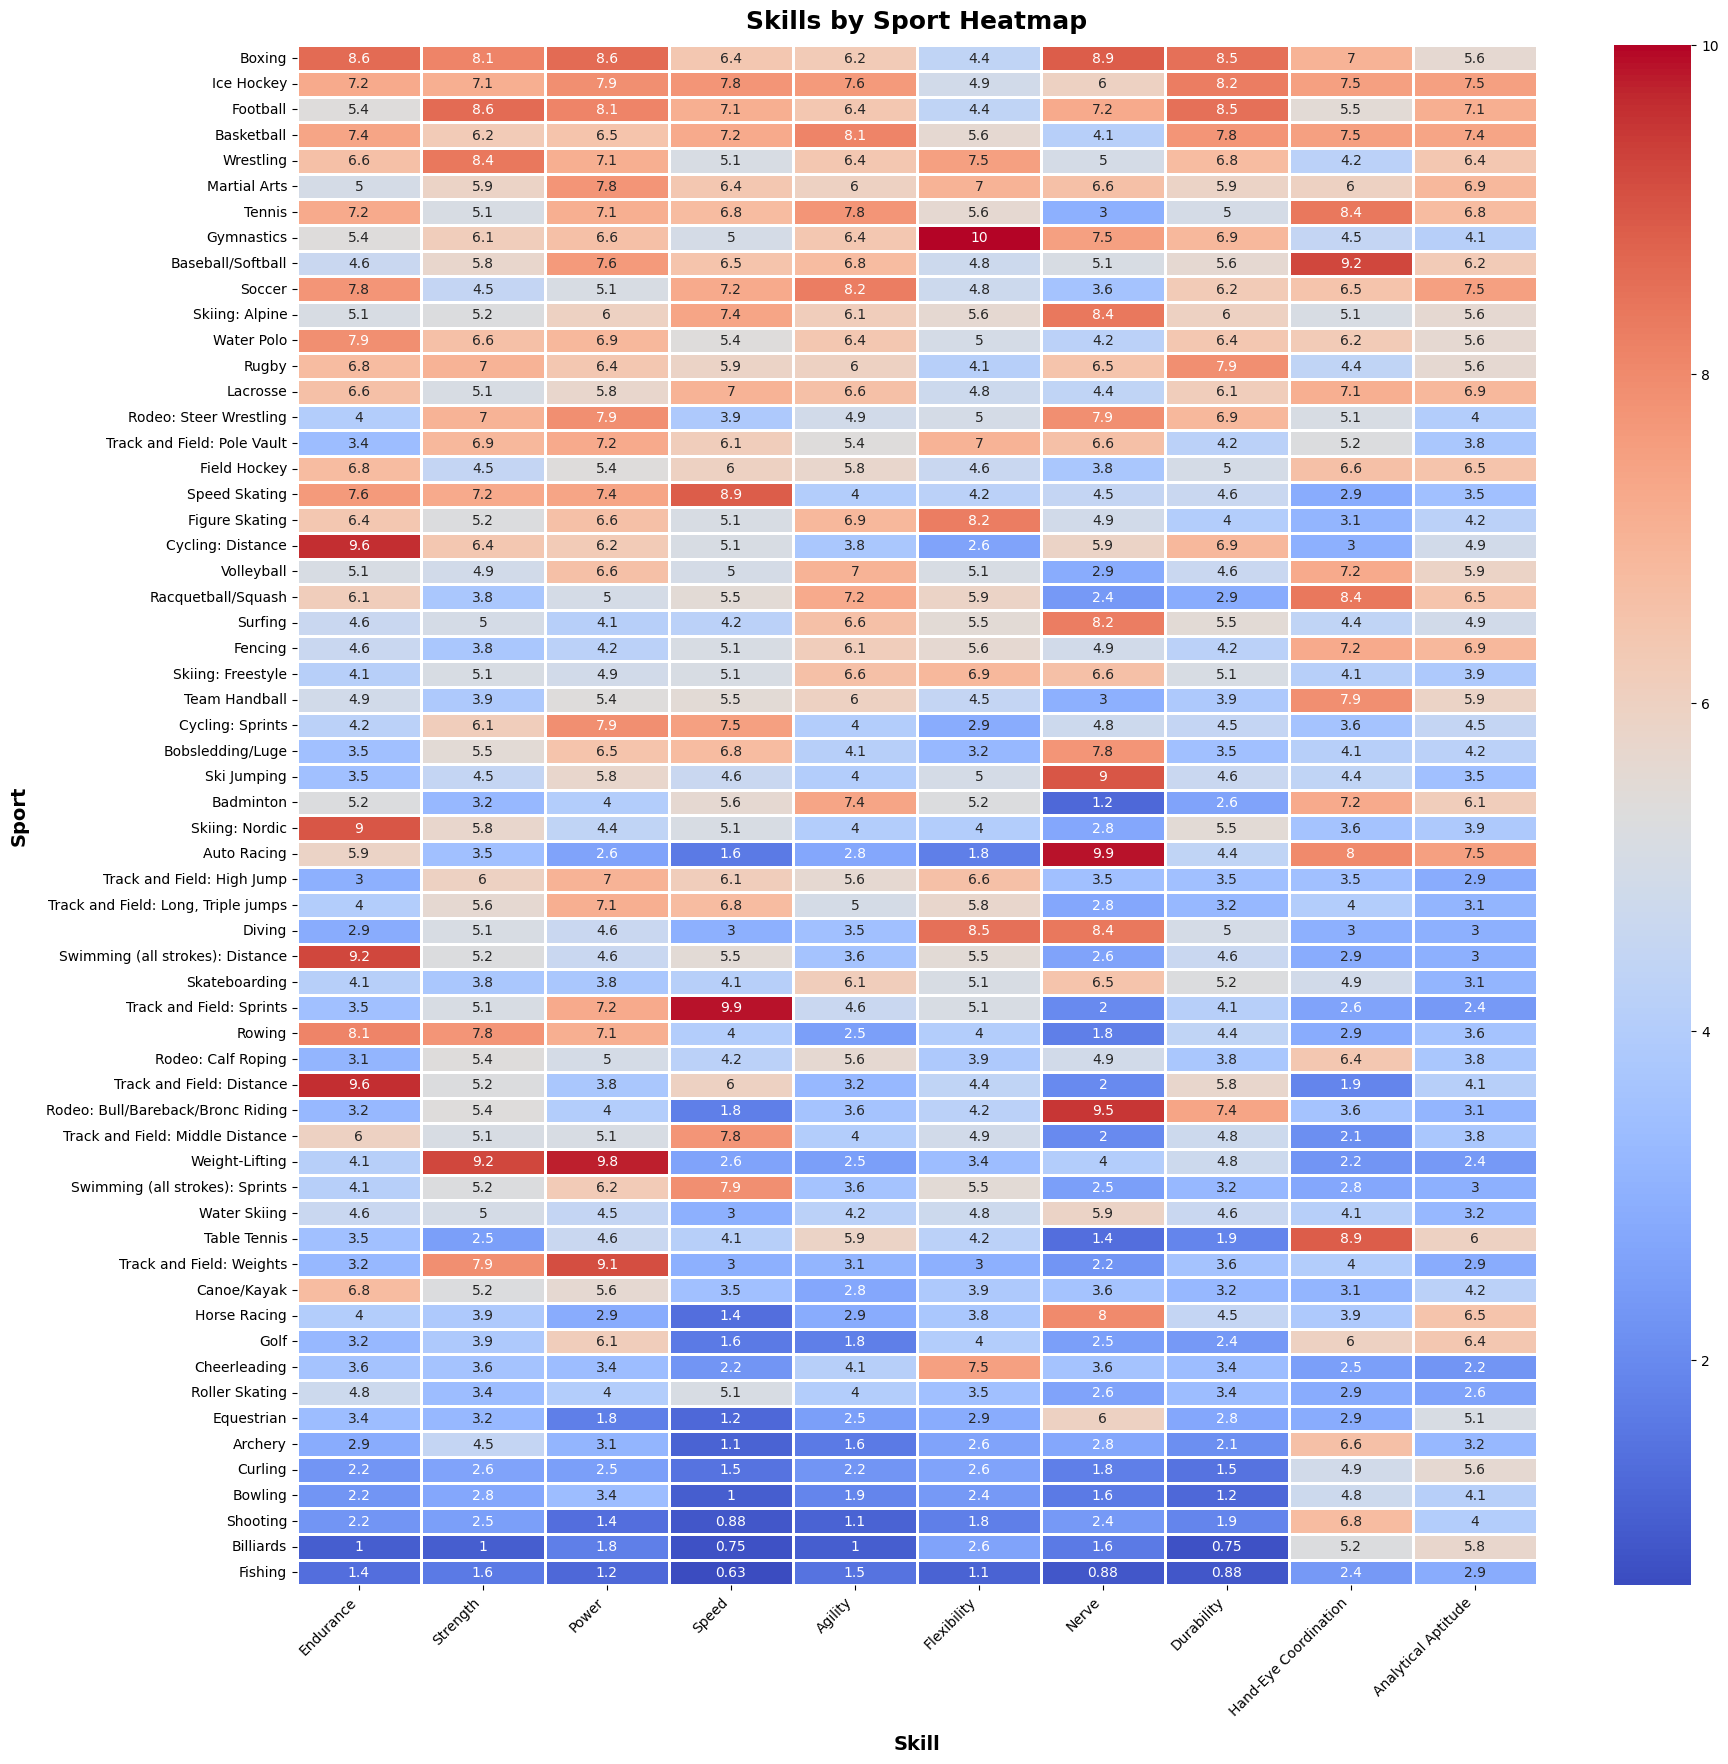

In [161]:
df_skills = df_skills.set_index('Sport')

fig, ax = plt.subplots(figsize=(20,20))

skills_heatmap = sns.heatmap(df_skills, annot=True, cmap='coolwarm', ax=ax,linewidths=2, annot_kws={"size": 10})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
colorbar = skills_heatmap.collections[0].colorbar
skills_heatmap.set_title('Skills by Sport Heatmap', fontdict={'fontsize':18}, pad=12, fontweight='bold')
skills_heatmap.set_xlabel('Skill', fontdict={'fontsize':14}, labelpad=12, fontweight='bold')
skills_heatmap.set_ylabel('Sport', fontdict={'fontsize':14}, labelpad=12, fontweight='bold')

In [162]:
import panel as pn
pn.extension('ipywidgets')

mpl_pane = pn.pane.Matplotlib(fig, dpi=144)

In [163]:

df_skills.head()

,Endurance,Strength,Power,Speed,Agility,Flexibility,Nerve,Durability,Hand-Eye Coordination,Analytical Aptitude
Sport,,,,,,,,,,
Boxing,8.63,8.13,8.63,6.38,6.25,4.38,8.88,8.50,7.00,5.63
Ice Hockey,7.25,7.13,7.88,7.75,7.63,4.88,6.00,8.25,7.50,7.50
Football,5.38,8.63,8.13,7.13,6.38,4.38,7.25,8.50,5.50,7.13
Basketball,7.38,6.25,6.50,7.25,8.13,5.63,4.13,7.75,7.50,7.38
Wrestling,6.63,8.38,7.13,5.13,6.38,7.50,5.00,6.75,4.25,6.38


In [164]:
sports = df_skills.index.tolist()
skills = df_skills.columns.tolist()

In [165]:
def get_skills_graph_by_sport(sport_select='Boxing'):
    sport_skills = df_skills.loc[sport_select]
    fig, ax = plt.subplots(figsize=(10,5))
    barPlot = ax.bar(skills, sport_skills, color='blue')
    ax.set_title(f'{sport_select} Skills', fontdict={'fontsize':18}, pad=12, fontweight='bold')
    ax.set_xlabel('Skill', fontdict={'fontsize':14}, labelpad=12, fontweight='bold')
    ax.set_ylabel('Skill Level', fontdict={'fontsize':14}, labelpad=12, fontweight='bold')
    ax.set_xticklabels(skills, rotation=45, horizontalalignment='right')
    plt.close()
    return fig

In [166]:
sport_select = pn.widgets.Select(name='Sport', options=sports)

In [167]:
interactive = pn.bind(get_skills_graph_by_sport, sport_select=sport_select)


In [169]:
first_app = pn.Column(mpl_pane, sport_select, interactive)

first_app

/tmp/ipykernel_20042/1814644776.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(skills, rotation=45, horizontalalignment='right')


BokehModel(combine_events=True, render_bundle={'docs_json': {'67f3f826-b7d1-423e-9185-f174b5ecb084': {'defs': …